In [59]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import splitfolders
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import datetime

In [60]:
#importing image dataset of concrete
img_dir = r"C:\Users\User\Downloads\Concrete with Cracks Image Classification Project\img_dataset"

#setup hyperparameters
BATCH_SIZE = 32
IMG_SIZE = (48, 48)
SEED = 12345
EPOCH = 50
LR = 0.01

In [ ]:
splitfolders.ratio(img_dir,output="output_img_dataset" ,
    seed=SEED, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values

In [61]:
train_data = r"C:\Users\User\Downloads\Concrete with Cracks Image Classification Project\output_img_dataset\train"
val_data = r"C:\Users\User\Downloads\Concrete with Cracks Image Classification Project\output_img_dataset\val"
test_data = r"C:\Users\User\Downloads\Concrete with Cracks Image Classification Project\output_img_dataset\test"

In [62]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, shear_range=0.3, zoom_range=0.3,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)
    
train_generator = train_datagen.flow_from_directory(train_data,color_mode='grayscale',
                                                    target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE, 
                                                    class_mode='categorical',shuffle=True)
valid_generator = test_datagen.flow_from_directory(val_data,color_mode='grayscale',
                                                    target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE, 
                                                    class_mode='categorical',shuffle=True)

test_generator = test_datagen.flow_from_directory(test_data,color_mode='grayscale',
                                                    target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE, 
                                                    class_mode='categorical',shuffle=True)

Found 28000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [63]:
print(list(train_generator.class_indices.keys()))
num_classes = 2

['Negative', 'Positive']


In [64]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation = 'softmax'))

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 46, 46, 6)         60        
                                                                 
 average_pooling2d_12 (Avera  (None, 23, 23, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 21, 21, 16)        880       
                                                                 
 average_pooling2d_13 (Avera  (None, 10, 10, 16)       0         
 gePooling2D)                                                    
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 120)              

In [65]:
checkpoint = ModelCheckpoint('model.h5',
                                 monitor='val_accuracy',
                                 mode='auto',
                                 save_best_only=True,
                                 save_weights_only=False,
                                 verbose=1)

earlystop = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=10,
                              verbose=1,
                              mode='auto',
                              restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                                  factor=0.2,
                                  patience=10,
                                  verbose=1,
                                  min_delta=0.0001)

base_log_path = r"C:\Users\User\Documents\My Documents\My Programme\AI And ML Competence For Industry 4.0\DLP A106\Source Code\cnn_log"
log_path = os.path.join(base_log_path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = TensorBoard(log_dir=log_path)

In [66]:
csv_logger = CSVLogger("LeNet_result.csv", append=True)

callbacks = [earlystop, checkpoint, reduce_lr, csv_logger,tb]

model.compile(loss='sparse_categorical_crossentropy',
                  loss_weights=0.3, 
                  optimizer='adam',
                  metrics=['accuracy'])

In [67]:
totalDir = 0
totalFiles = 0
totalDir1 = 0
totalFiles1 = 0
for base, dirs, files in os.walk(train_data):
    for directories in dirs:
            totalDir+=1
    for Files in files:
            totalFiles+=1
print("Total Files: ",totalFiles)

for base1, dirs1, files1 in os.walk(val_data):
    for directories in dirs1:
            totalDir1+=1
    for Files in files1:
            totalFiles1+=1
print("Total Files: ",totalFiles1)
nb_train_samples = totalFiles
nb_validation_samples = totalFiles1

Total Files:  28000
Total Files:  8000


In [68]:
history = model.fit(train_generator,
                    steps_per_epoch=nb_train_samples//BATCH_SIZE,
                    epochs=EPOCH,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks,
                    validation_data=valid_generator,
                    validation_steps=nb_validation_samples//BATCH_SIZE)

Epoch 1/50
875/875 [==============================] - ETA: 0s - loss: 0.1530 - accuracy: 0.7503
Epoch 1: val_accuracy improved from -inf to 0.93425, saving model to model.h5
875/875 [==============================] - 197s 222ms/step - loss: 0.1530 - accuracy: 0.7503 - val_loss: 0.0596 - val_accuracy: 0.9342 - lr: 0.0100
Epoch 2/50
875/875 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9233
Epoch 2: val_accuracy improved from 0.93425 to 0.96650, saving model to model.h5
875/875 [==============================] - 175s 200ms/step - loss: 0.0621 - accuracy: 0.9233 - val_loss: 0.0305 - val_accuracy: 0.9665 - lr: 0.0100
Epoch 3/50
875/875 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9431
Epoch 3: val_accuracy improved from 0.96650 to 0.97425, saving model to model.h5
875/875 [==============================] - 165s 189ms/step - loss: 0.0500 - accuracy: 0.9431 - val_loss: 0.0306 - val_accuracy: 0.9743 - lr: 0.0100
Epoch 4/50
875/875 [========

In [69]:
#Evaluation and prediction
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy :', accuracy)

125/125 [==============================] - 18s 144ms/step - loss: 0.0161 - accuracy: 0.9855
Test accuracy : 0.9854999780654907


In [91]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_generator.next()
predictions = model.predict_on_batch(image_batch).flatten()

In [94]:
predictions = tf.nn.softmax(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

In [95]:
print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

Predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Labels:
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [96]:
class_names = list(train_generator.class_indices.keys())

In [97]:
image_batch = image_batch.reshape(48,48,-1)

In [ ]:
mage_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
print(Y_train[image_x].shape)
print(np.squeeze(Y_train[image_x]).shape)
imshow(np.squeeze(Y_train[image_x]))
plt.show()

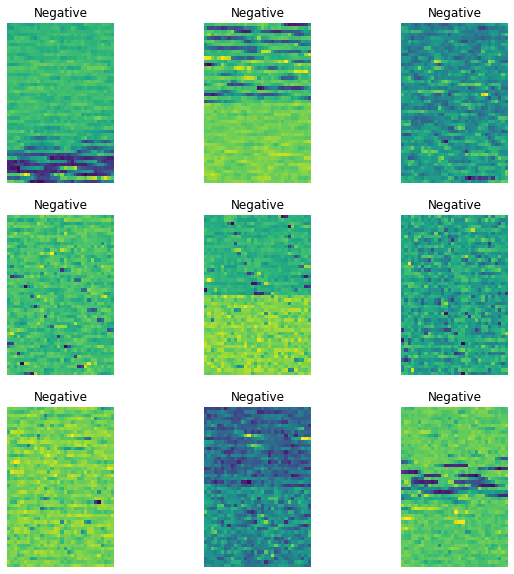

In [98]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  #image_batch[i] = np.squeeze(image_batch[i])
  #print(image_batch[i].shape)
  plt.imshow(np.squeeze(image_batch[i]))
  plt.title(class_names[predictions[i]])
  plt.axis("off")
plt.show()

In [99]:
print('Testing dataset')
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(confusion_matrix(test_generator.classes, y_pred))
print('-------------------------------------------------------------------------------------')
class_labels = list(test_generator.class_indices.keys())
print('Classification Report')
target_names = class_labels
print('Target names')
print(classification_report(test_generator.classes, y_pred, 
                            target_names=target_names, zero_division=1))
print('Labels')
print(classification_report(test_generator.classes, y_pred, 
                            labels=np.unique(y_pred), zero_division=1))

Testing dataset
125/125 [==============================] - 17s 134ms/step
[[ 990 1010]
 [1004  996]]
-------------------------------------------------------------------------------------
Classification Report
Target names
              precision    recall  f1-score   support

    Negative       0.50      0.49      0.50      2000
    Positive       0.50      0.50      0.50      2000

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000

Labels
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      2000
           1       0.50      0.50      0.50      2000

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



In [101]:
print('Testing dataset')
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(confusion_matrix(valid_generator.classes, y_pred))
print('-------------------------------------------------------------------------------------')
class_labels = list(valid_generator.class_indices.keys())
print('Classification Report')
target_names = class_labels
print('Target names')
print(classification_report(valid_generator.classes, y_pred, target_names=target_names, zero_division=1))
print('Labels')
print(classification_report(valid_generator.classes, y_pred, labels=np.unique(y_pred), zero_division=1))

Testing dataset
250/250 [==============================] - 36s 143ms/step
[[1998 2002]
 [1988 2012]]
-------------------------------------------------------------------------------------
Classification Report
Target names
              precision    recall  f1-score   support

    Negative       0.50      0.50      0.50      4000
    Positive       0.50      0.50      0.50      4000

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.50      0.50      0.50      8000

Labels
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4000
           1       0.50      0.50      0.50      4000

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.50      0.50      0.50      8000

